In [ ]:
# ML Internship Project - Diabetes Classification


## Importing Dataset and Python Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import skew

# Loading Data In Notebook

dib_df = pd.read_csv("diabetes_data_upload.csv")
dib_df # Displaying Data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [2]:
# Importing Warnings to avoid Warnings . 

import warnings 
warnings.filterwarnings('ignore')


## Data Visualisation

In [3]:
# Display first five elements of data.

dib_df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [5]:
# Checking the data types of the Data Set

dib_df.dtypes

Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object

In [6]:
# Number of rows and columns.

dib_df.shape

(520, 17)

In [7]:
# Checking for null / missing values Column wise

dib_df.isnull().any()

Age                   False
Gender                False
Polyuria              False
Polydipsia            False
sudden weight loss    False
weakness              False
Polyphagia            False
Genital thrush        False
visual blurring       False
Itching               False
Irritability          False
delayed healing       False
partial paresis       False
muscle stiffness      False
Alopecia              False
Obesity               False
class                 False
dtype: bool

In [8]:
print('Total Missing Values in the data :- ',dib_df.isnull().sum().sum())

Total Missing Values in the data :-  0


#### Inference : - No Missing Value or Null Value in the data

In [9]:
# Finding out if the dataset contains any null value

dib_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [10]:
# To check what values are their in the data like in Age 

dib_df['Age'].unique() 

array([40, 58, 41, 45, 60, 55, 57, 66, 67, 70, 44, 38, 35, 61, 54, 43, 62,
       39, 48, 32, 42, 52, 53, 37, 49, 63, 30, 50, 46, 36, 51, 59, 65, 25,
       47, 28, 68, 56, 31, 85, 90, 72, 69, 79, 34, 16, 33, 64, 27, 29, 26])

In [11]:
dib_df['Obesity'].unique() 

array(['Yes', 'No'], dtype=object)

In [12]:
dib_df['class'].unique() 

array(['Positive', 'Negative'], dtype=object)

In [13]:
dib_df.nunique() # No. of unique values in all columns

Age                   51
Gender                 2
Polyuria               2
Polydipsia             2
sudden weight loss     2
weakness               2
Polyphagia             2
Genital thrush         2
visual blurring        2
Itching                2
Irritability           2
delayed healing        2
partial paresis        2
muscle stiffness       2
Alopecia               2
Obesity                2
class                  2
dtype: int64

In [14]:
dib_df.count() # No. of values in all columns

Age                   520
Gender                520
Polyuria              520
Polydipsia            520
sudden weight loss    520
weakness              520
Polyphagia            520
Genital thrush        520
visual blurring       520
Itching               520
Irritability          520
delayed healing       520
partial paresis       520
muscle stiffness      520
Alopecia              520
Obesity               520
class                 520
dtype: int64

# EDA Section

## Doing Bi-Variate Analysis and Multivariant Analysis to know the relationships between     multiple attributes .

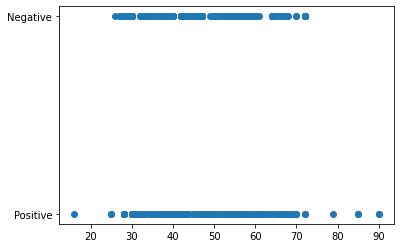

In [15]:
# To know the relationship b/w the Age and Class ?
# We use Scatter Plot

plt.scatter(x="Age",y="class",data=dib_df)

#### Inference :- From above plot we can infer that the problem of diabetes is occured between the age group 30-70
#### Inference :- But from above we cannot get the good information so we can't use this plot further.

<AxesSubplot:xlabel='class', ylabel='Age'>

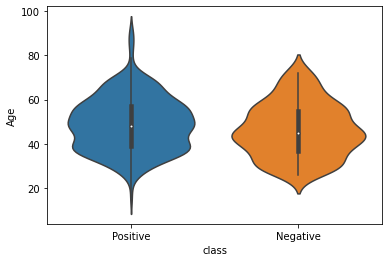

In [16]:
# Now we use ViolinPlot as it shows the distribution of quantitative data across several levels of one (or more) categorical variables 

sns.violinplot(x="class",y="Age",data=dib_df)

#### Inference : - Age group (40-60) is much more prone to diabetes

<AxesSubplot:xlabel='class', ylabel='Age'>

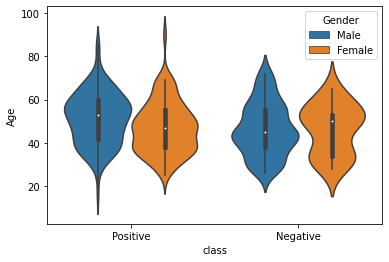

In [17]:
sns.violinplot(x="class",y="Age",data=dib_df,hue="Gender") # Analysing the relationships between class ,Age and Gender

#### Inference :- Male of Age group (55-60) has more chances of having Diabetes as compare to Females in that age group.
#### Inference :- Female of Age group (40-55) has more chances of having Diabetes as compare to Males in that age group.

<AxesSubplot:xlabel='class', ylabel='Age'>

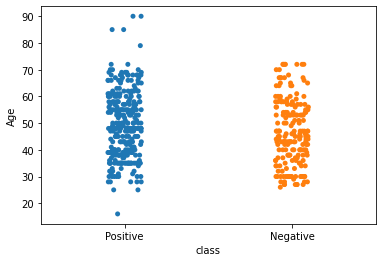

In [18]:
# We also use another Plot like Strip Plot to represent data.

sns.stripplot(x="class",y="Age",data=dib_df,jitter=True)

#### Inference :- Probem with this plot is that we cannot identiy which age group has more count of Diabetic Patients.
#### Inference :- Because several points are getting overlapped , so we use Swarm Plot for that purpose.

<AxesSubplot:xlabel='class', ylabel='Age'>

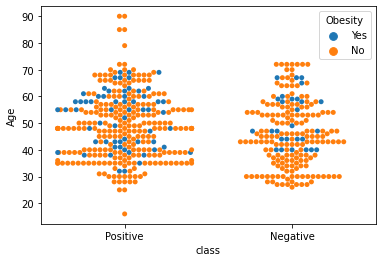

In [19]:
sns.swarmplot(x="class",y="Age",data=dib_df,hue = "Obesity") # Analysing the relationships between class ,Age & Obesity

#### Inference :- People who are not obese are much more prone to those who does not have obesity.
#### Inference :- This type of Obesity data can mislead our ML Model.
#### Inference :- Since Obese People are much more prone to Diabetes . So we have to check its correlation with our target variable in our Dataset.

<AxesSubplot:xlabel='class', ylabel='Age'>

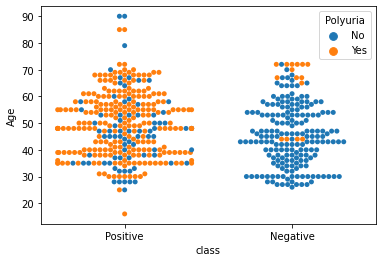

In [20]:
sns.swarmplot(x="class",y="Age",data=dib_df,hue = "Polyuria") # Analysing relationships between class,Age & Polyuria

#### Inference :- People who are suffering from Polyuria are much more prone to diabetes.

<AxesSubplot:xlabel='class', ylabel='Age'>

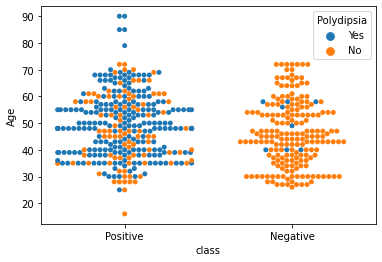

In [21]:
sns.swarmplot(x="class",y="Age",data=dib_df,hue = "Polydipsia") # Analysing the relationships between class ,Age & Polydipsia

#### Inference :- People who are suffering from Polydipsia are much more prone to diabetes.

<AxesSubplot:xlabel='class', ylabel='Age'>

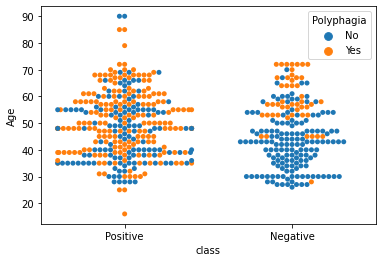

In [22]:
sns.swarmplot(x="class",y="Age",data=dib_df,hue = "Polyphagia") # Analysing the relationships between class ,Age & Polyphagia

#### Inference :- People who are suffering from Diabetes can have the possibility of developing Polyghapia in all age groups. 
#### Inference :- But the people in the Age Group (60-70) has the higher chance to have Polyghapia whether they have Diabetes or not. 

<AxesSubplot:xlabel='class', ylabel='Age'>

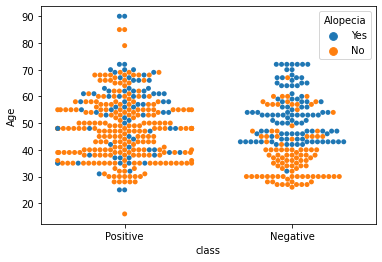

In [23]:
sns.swarmplot(x="class",y="Age",data=dib_df,hue = "Alopecia")# Analysing the relationships between class ,Age & Alopecia

#### Inference :- People who have Alopecia are not so much prone to Diabetes to those who does not have Alopecia (specially in the Age Group (40-70).
#### Inference :- This type of Alopecia data can mislead our ML Model.
#### Inference :- Since People suffer from Alopecia are more prone to Diabetes . So we have to check its correlation with our target variable in our Dataset.¶.

<AxesSubplot:xlabel='class', ylabel='Age'>

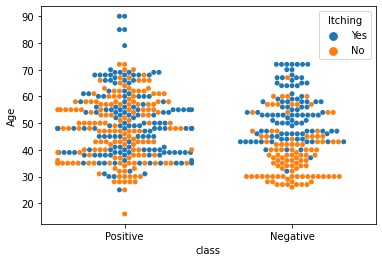

In [24]:
sns.swarmplot(x="class",y="Age",data=dib_df,hue = "Itching")# Analysing the relationships between class ,Age & Itching

#### Inference :- People who have Itching are not so much prone to Diabetes to those who does not have Alopecia (specially in the Age Group (40-70).
#### Inference :- This type of Itching data can mislead our ML Model.
#### Inference :- Since People suffer from Diabetes are more prone to Itching . So we have to check its correlation with our target variable in our Dataset.

<AxesSubplot:xlabel='class', ylabel='Age'>

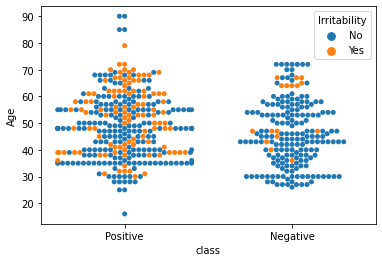

In [25]:
sns.swarmplot(x="class",y="Age",data=dib_df,hue = "Irritability")# Analysing the relationships between class ,Age & Irritability

#### Inference :- People who suffer from Diabetes has more chance to suffer from Irritability in comparison to those who does not have Diabetes.
#### Inference :- Irritability Problem mainly occurs in the Age Group of 55-70 suffering from Diabetes.

<AxesSubplot:xlabel='class', ylabel='Age'>

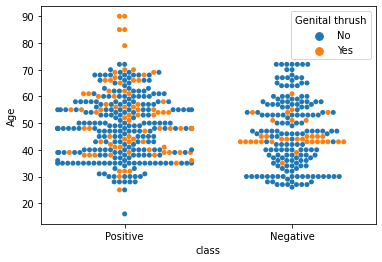

In [26]:
sns.swarmplot(x="class",y="Age",data=dib_df,hue = "Genital thrush")# Analysing the relationships between class ,Age & Genital thrush 

#### Inference :- People who have Diabetes are not so much prone to Genital Thrush. 
#### Inference :- This type of Genital Thrush data can mislead our ML Model.
#### Inference :- Since People suffer from Diabetes are more prone to Genital Thrush . So we have to check its correlation with our target variable in our Dataset.

<AxesSubplot:xlabel='class', ylabel='Age'>

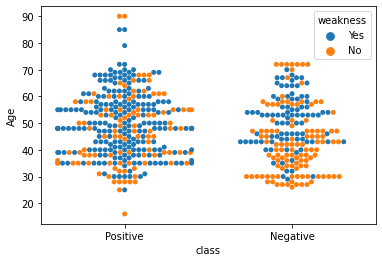

In [27]:
sns.swarmplot(x="class",y="Age",data=dib_df,hue = "weakness")# Analysing the relationships between class ,Age & weakness

#### Inference :- People who suffer from Diabetes has very much chance to suffer from Weakness in comparison to those who does not have Diabetes

<AxesSubplot:xlabel='class', ylabel='Age'>

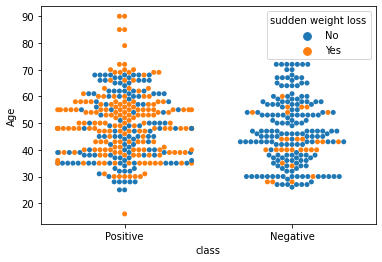

In [28]:
sns.swarmplot(x="class",y="Age",data=dib_df,hue = "sudden weight loss")# Analysing the relationships between class ,Age & sudden weight loss

#### Inference :- People who suffer from Diabetes has very much chance to have Sudden Weight Loss in comparison to those who does not have Diabetes
#### Inference :- Sudden Weight Loss are very much common in the Age Group (50-60) suffering from Diabetes

<AxesSubplot:xlabel='class', ylabel='Age'>

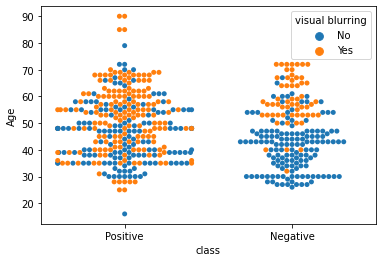

In [29]:
sns.swarmplot(x="class",y="Age",data=dib_df,hue = "visual blurring")# Analysing the relationships between class ,Age & visual blurring

#### Inference :- People who suffer from Diabetes are likely to have Visual Blurriness in almost all age groups.
#### Inference :- Visual Blurriness are very much common in the Age Group (50-70) whether they suffer from Diabetes or not.

<AxesSubplot:xlabel='class', ylabel='Age'>

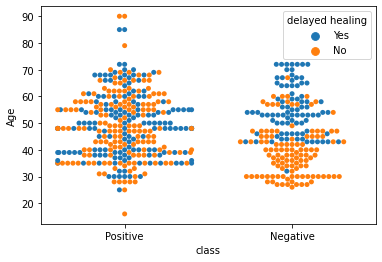

In [30]:
sns.swarmplot(x="class",y="Age",data=dib_df,hue = "delayed healing")# Analysing the relationships between class ,Age & delayed healing

#### Inference :- People who suffer from Diabetes are likely to have Delayed Healing in almost all age groups.
#### Inference :- People in the Age Group (25- 45) does not have the problem of delayed healing if they are Negative but after that it is very much common whether they suffer ffrom Diabetes or not. 

<AxesSubplot:xlabel='class', ylabel='Age'>

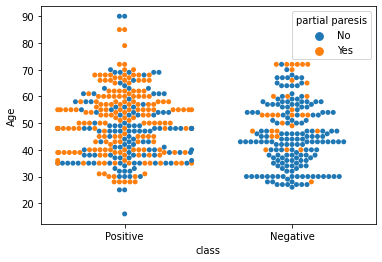

In [31]:
sns.swarmplot(x="class",y="Age",data=dib_df,hue = "partial paresis")# Analysing the relationships between class ,Age & partial paresis

#### Inference :- People who suffer from Diabetes has very much chance to have Partial Paresis in almost all Age Groups.
#### Inference :- People who does not suffer from Diabetes has very low chance to have Partial Paresis but can develop in the age above 70.

<AxesSubplot:xlabel='class', ylabel='Age'>

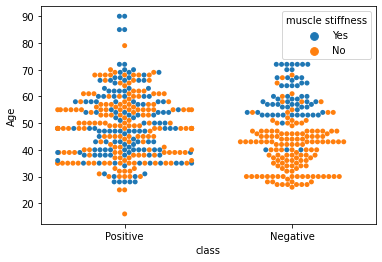

In [32]:
sns.swarmplot(x="class",y="Age",data=dib_df,hue = "muscle stiffness")# Analysing the relationships between class ,Age & muscle stiffness

#### Inference :- People who suffer from Diabetes are likely to have problem of Muscle Stiffness in almost all age groups.
#### Inference :- People in the Age Group (25- 50) does not have the problem of Muscle Stiffness if they are Negative but after that it is very much common whether they suffer ffrom Diabetes or not. 

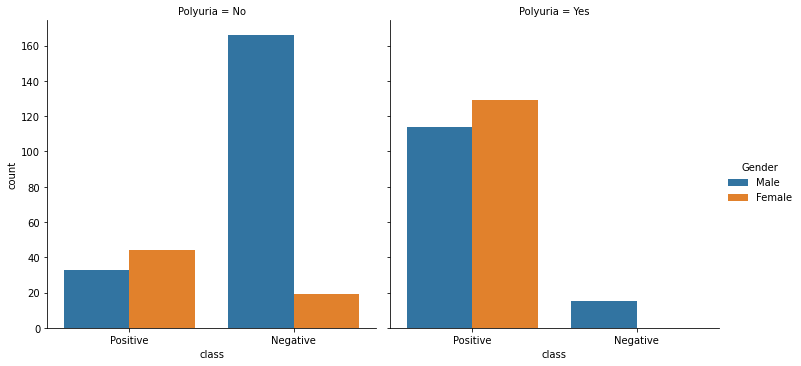

In [33]:
# Use catplot() to combine a various plot() and a FacetGrid. 
# This allows grouping within additional categorical variables. 

sns.catplot(x="class",data=dib_df,hue = "Gender",col="Polyuria",kind="count")

#### Inference :-  Females suffer from Diabetes are likely to have Polyuria as compared to males who have Diabetes.
#### Inference :-  Females who does not have Diabetes does not suffer from Polyuria.

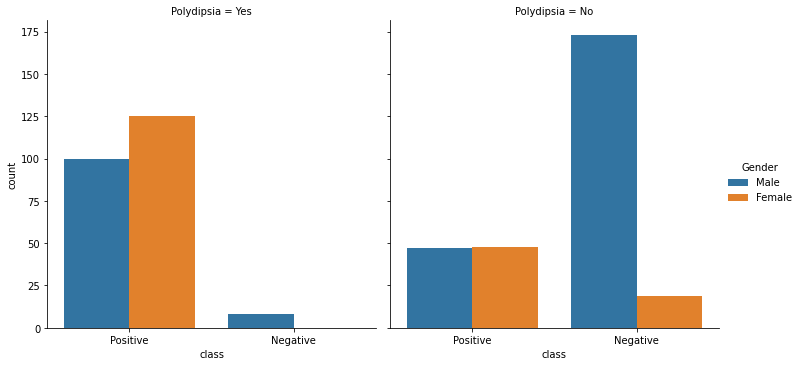

In [34]:
sns.catplot(x="class",data=dib_df,hue = "Gender",col="Polydipsia",kind="count")

#### Inference :-  Females suffer from Polydipsia are likely to have Diabetes more than the males who have Polydipsia.
#### Inference :-  Males who does not have Polydipsia does not suffer from Diabetes are far more than the females.
#### Inference :- There are no females and very less males who suffer from Polydipsia also suffer from Diabetes.
#### Inference :- Males and Females are equal who suffer from Diabetes but does not suffer from Polydipsia

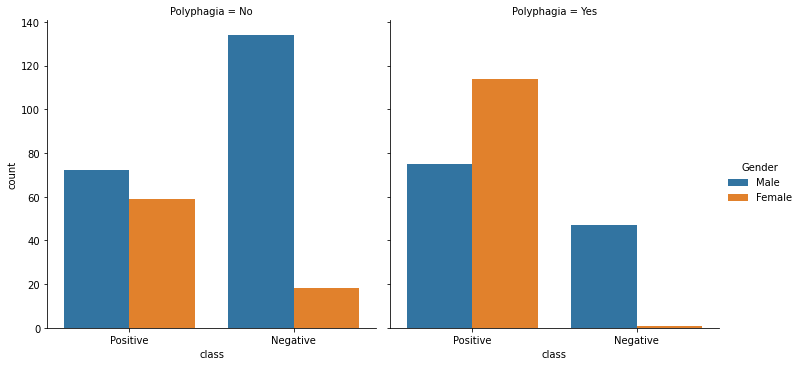

In [35]:
sns.catplot(x="class",data=dib_df,hue = "Gender",col="Polyphagia",kind="count")

#### Inference :- Females suffer from Polyphagia are likely to have Diabetes more than the males who have Polydipsia.
#### Inference :- Males who does not have Polydipsia does not suffer from Diabetes are far more than the females.
#### Inference :- Males are far more than the females who suffer from Polyphagia but does not have Diabetes.
#### Inference :- Males and Females are almost equal who suffer from Diabetes and also suffer from Polydipsia.

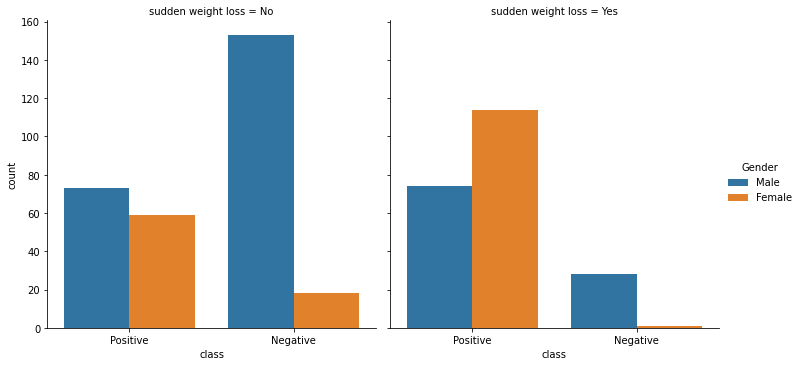

In [36]:
sns.catplot(x="class",data=dib_df,hue = "Gender",col="sudden weight loss",kind="count")

#### Inference :- Females suffer from sudden weight loss are likely to have Diabetes more than the males who have sudden weight loss.
#### Inference :- Males who does not have sudden weight loss does not suffer from Diabetes are far more than the females.
#### Inference :- Males are far more than the females who suffer from sudden weight loss but does not have Diabetes.
#### Inference :- Males and Females are almost equal who suffer from Diabetes and also suffer from sudden weight loss.

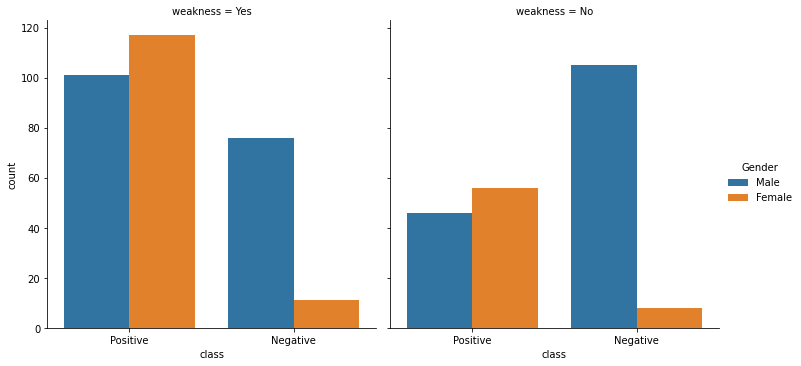

In [37]:
sns.catplot(x="class",data=dib_df,hue = "Gender",col="weakness",kind="count")

#### Inference :- Females suffer from weakness are likely to have Diabetes more than the males who have weakness.
#### Inference :- Males who does not have weakness does not suffer from Diabetes are far more than the females.
#### Inference :- Males suffer from weakness does not have Diabetes more than the females who have weakness.
#### Inference :- Males and Females are almost equal who suffer from Diabetes but does not suffer from weakness.

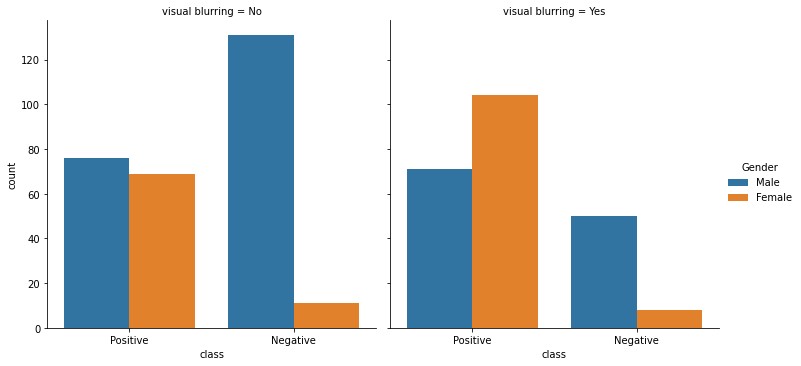

In [38]:
sns.catplot(x="class",data=dib_df,hue = "Gender",col="visual blurring",kind="count")

#### Inference :- Females suffer from visual blurring are likely to have Diabetes more than the males who have visual blurring.
#### Inference :- Males who does not have visual blurring does not suffer from Diabetes are far more than the females.
#### Inference :- Males are far more than the females who suffer from visual blurring but does not have Diabetes.
#### Inference :- Males and Females are almost equal who suffer from Diabetes and also suffer from visual blurring.

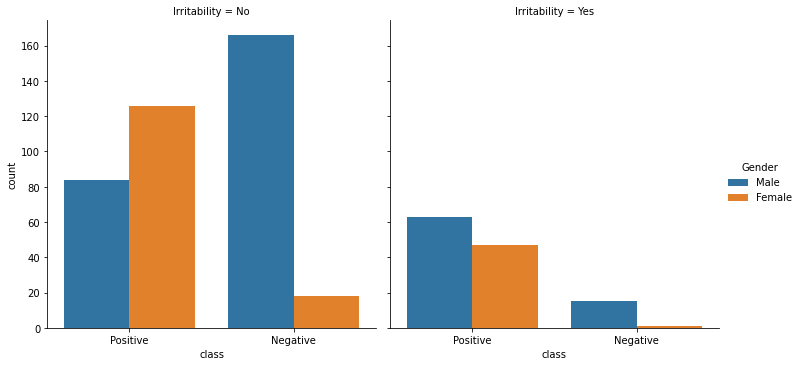

In [39]:
sns.catplot(x="class",data=dib_df,hue = "Gender",col="Irritability",kind="count")

#### Inference :- Females suffer from Irritability are likely to have Diabetes more than the males who have Irritability.
#### Inference :- Males who does not have Irritability does not suffer from Diabetes are far more than the females.
#### Inference :- Males are more than the females who suffer from Irritability but does not have Diabetes.
#### Inference :- Males are less than Females who suffer from Diabetes and also does not suffer from Irritability.

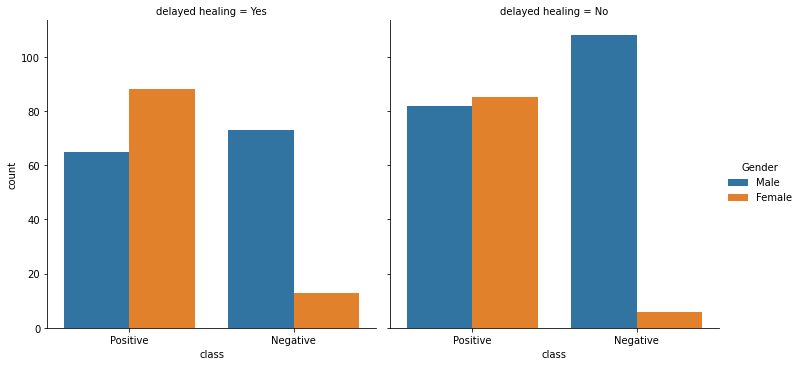

In [40]:
sns.catplot(x="class",data=dib_df,hue = "Gender",col="delayed healing",kind="count")

#### Inference :- Females suffer from delayed healing are likely to have Diabetes more than the males who have delayed healing.
#### Inference :- Males who does not have delayed healing does not suffer from Diabetes are far more than the females.
#### Inference :- Males suffer from delayed healing does not have Diabetes more than the females who have delayed healing.
#### Inference :- Males and Females are almost equal who suffer from Diabetes but does not suffer from delayed healing.

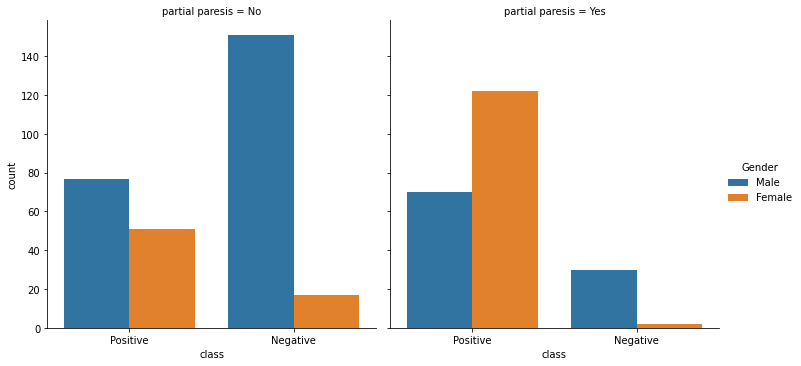

In [41]:
sns.catplot(x="class",data=dib_df,hue = "Gender",col="partial paresis",kind="count")

#### Inference :- Females suffer from partial paresis are likely to have Diabetes more than the males who have partial paresis.
#### Inference :- Males who does not have partial paresis does not suffer from Diabetes are far more than the females.
#### Inference :- Males are far more than the females who suffer from partial paresis but does not have Diabetes.
#### Inference :- Males and Females are almost equal who suffer from Diabetes and also suffer from partial paresis.

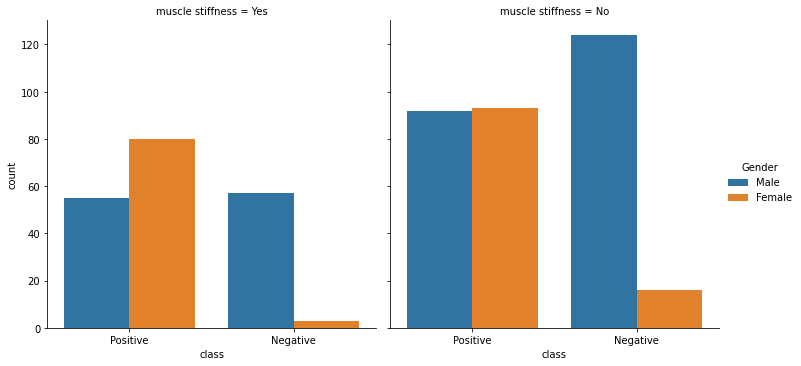

In [42]:
sns.catplot(x="class",data=dib_df,hue = "Gender",col="muscle stiffness",kind="count")

In [43]:
#### Inference :- Females suffer from muscle stiffness are likely to have Diabetes more than the males who have muscle stiffness.
#### Inference :- Males who does not have muscle stiffness does not suffer from Diabetes are far more than the females.
#### Inference :- Males suffer from muscle stiffness does not have Diabetes more than the females who have muscle stiffness.
#### Inference :- Males and Females are almost equal who suffer from Diabetes but does not suffer from muscle stiffness.

## Outlier Detection

<AxesSubplot:xlabel='Age'>

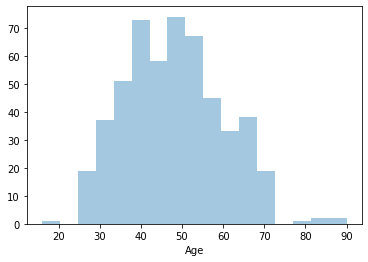

In [44]:
sns.distplot(dib_df["Age"],kde=False) # Used for Uni-variate Data

Skew is :  0.3293593578272701


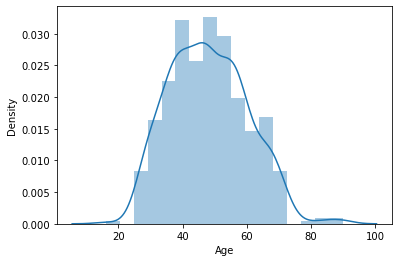

In [45]:
sns.distplot(dib_df["Age"]) # Used for Uni-variate Data
age = dib_df["Age"]
print("Skew is : ",age.skew())

#### Inference :-  Data is Normally Distributed when we delete Outliers that occur between Age Group (80-100)

<AxesSubplot:xlabel='class', ylabel='Age'>

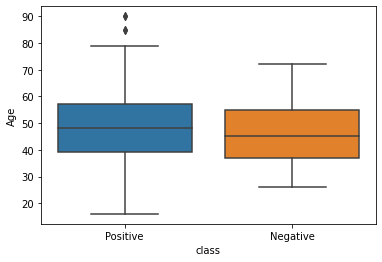

In [46]:
sns.boxplot(x="class",y="Age",data=dib_df) # Using Boxplot for Outlier Detection in Age as it is only has numerical data.

#### Inference :- There are Outliers that occur between Age Group (80-100).

<AxesSubplot:xlabel='class', ylabel='Age'>

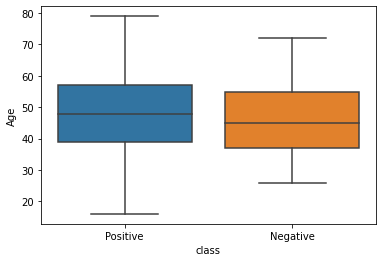

In [47]:
# Removing Outliers from Age Column

dib_df = dib_df.loc[dib_df["Age"]<80]
sns.boxplot(x="class",y="Age",data=dib_df)

#### Inference :- We can see Outliers are removed.

Skew is :  0.14799347086276324


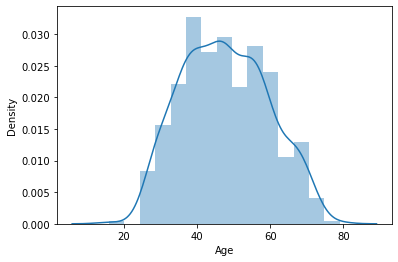

In [48]:
sns.distplot(dib_df["Age"]) # Used for Uni-variate Data
age = dib_df["Age"]
print("Skew is : ",age.skew())


#### Inference :- Now we can see that the data of Age is Normally distributed and Skewness is also reduced as compared to when outliers are not removed.

### Since Data has various Features/Attributes of Data Type Object , such as 'Gender'(Male and Female) , 'Obesity'(Yes and No) and so on
### Since our Machine Learning Algorithms can only read Numerical Values.
### So it is essential to encode Object Features into Numerical Values

In [49]:
# Object boolean mask

object_feature_mask = dib_df.dtypes == 'object'
object_feature_mask 

Age                   False
Gender                 True
Polyuria               True
Polydipsia             True
sudden weight loss     True
weakness               True
Polyphagia             True
Genital thrush         True
visual blurring        True
Itching                True
Irritability           True
delayed healing        True
partial paresis        True
muscle stiffness       True
Alopecia               True
Obesity                True
class                  True
dtype: bool

In [50]:
# Filter object columns using mask and turn it into a list

object_cols = dib_df.columns[object_feature_mask].tolist()
object_cols

['Gender',
 'Polyuria',
 'Polydipsia',
 'sudden weight loss',
 'weakness',
 'Polyphagia',
 'Genital thrush',
 'visual blurring',
 'Itching',
 'Irritability',
 'delayed healing',
 'partial paresis',
 'muscle stiffness',
 'Alopecia',
 'Obesity',
 'class']

In [51]:
# We use LabelEncoder converts each class under specified feature to a numerical value.

dib_df.head() # Data Set before Label Encoding.

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [52]:
# Import Label Encoder

import sklearn
from sklearn.preprocessing import LabelEncoder

# Instantiate Label Encoder Object
le = LabelEncoder()

In [53]:
 # apply le on object feature columns

dib_df[object_cols] = dib_df[object_cols].apply(lambda col: le.fit_transform(col)) 
dib_df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


#### Inference :- All The features of Categorical Type Object are converted to Numerical Data Type .

### Building Correlation 

In [54]:
corr = dib_df.corr() # Saving Correlation of Dataset in corr variable.
corr # Displaying Correlation 

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
Age,1.000000,0.074803,0.210808,0.114757,0.036761,0.241739,0.330035,0.052364,0.393076,0.283702,0.225627,0.269375,0.241912,0.289107,0.326969,0.158619,0.092871
Gender,0.074803,1.000000,-0.279153,-0.312804,-0.282130,-0.134090,-0.229694,0.216773,-0.207669,-0.050770,-0.015008,-0.110723,-0.342926,-0.088796,0.340038,-0.006377,-0.450654
Polyuria,0.210808,-0.279153,1.000000,0.603748,0.451316,0.257241,0.369006,0.088704,0.237072,0.088934,0.238991,0.143260,0.437318,0.154453,-0.137286,0.127184,0.670077
Polydipsia,0.114757,-0.312804,0.603748,1.000000,0.399872,0.336950,0.318843,0.012249,0.324803,0.120950,0.209573,0.116000,0.444949,0.171544,-0.316778,0.103149,0.646587
sudden weight loss,0.036761,-0.282130,0.451316,0.399872,1.000000,0.287222,0.244981,0.074168,0.059191,-0.014060,0.146496,0.088219,0.265229,0.099107,-0.207827,0.174512,0.432719
weakness,0.241739,-0.134090,0.257241,0.336950,0.287222,1.000000,0.173936,0.030866,0.305259,0.313402,0.146709,0.330419,0.267447,0.267746,0.100033,0.045271,0.245952
Polyphagia,0.330035,-0.229694,0.369006,0.318843,0.244981,0.173936,1.000000,-0.066152,0.295345,0.144842,0.241097,0.258191,0.368589,0.322486,-0.045991,0.030238,0.344138
Genital thrush,0.052364,0.216773,0.088704,0.012249,0.074168,0.030866,-0.066152,1.000000,-0.167532,0.112458,0.171269,0.137334,-0.201164,-0.121288,0.203816,0.061237,0.100456
visual blurring,0.393076,-0.207669,0.237072,0.324803,0.059191,0.305259,0.295345,-0.167532,1.000000,0.284878,0.082457,0.178618,0.366165,0.405821,0.011895,0.113520,0.246272
Itching,0.283702,-0.050770,0.088934,0.120950,-0.014060,0.313402,0.144842,0.112458,0.284878,1.000000,0.119145,0.456316,0.116497,0.207484,0.266229,0.005516,-0.019808


In [55]:
corr['class'].sort_values(ascending=False) # Displaying Correlation values in Descending Order

class                 1.000000
Polyuria              0.670077
Polydipsia            0.646587
partial paresis       0.434219
sudden weight loss    0.432719
Polyphagia            0.344138
Irritability          0.304046
visual blurring       0.246272
weakness              0.245952
muscle stiffness      0.115590
Genital thrush        0.100456
Age                   0.092871
Obesity               0.075181
delayed healing       0.046779
Itching              -0.019808
Alopecia             -0.271448
Gender               -0.450654
Name: class, dtype: float64

In [56]:
corr['class'].sort_values(ascending=False)[:5] # Displaying top 5 Strong Correlation values

class                 1.000000
Polyuria              0.670077
Polydipsia            0.646587
partial paresis       0.434219
sudden weight loss    0.432719
Name: class, dtype: float64

In [57]:
corr['class'].sort_values(ascending=False)[-5:] # Displaying top 5 Weak Correlation values

Obesity            0.075181
delayed healing    0.046779
Itching           -0.019808
Alopecia          -0.271448
Gender            -0.450654
Name: class, dtype: float64

#### Inference :- Removing Columns like "Obesity" , "Alopecia" , "Genital Thrush" , "Itching" because they are very weak correlated . Also from Bi-Variate Analysis we get to know that the above columns are giving false trends .

In [58]:
# droping the below attributes

drop_me = ["Obesity" , "Alopecia" , "Genital thrush" , "Itching"] 
dib_df = dib_df.drop(drop_me, axis=1)

### Lets take a look at a correlation heatmap.

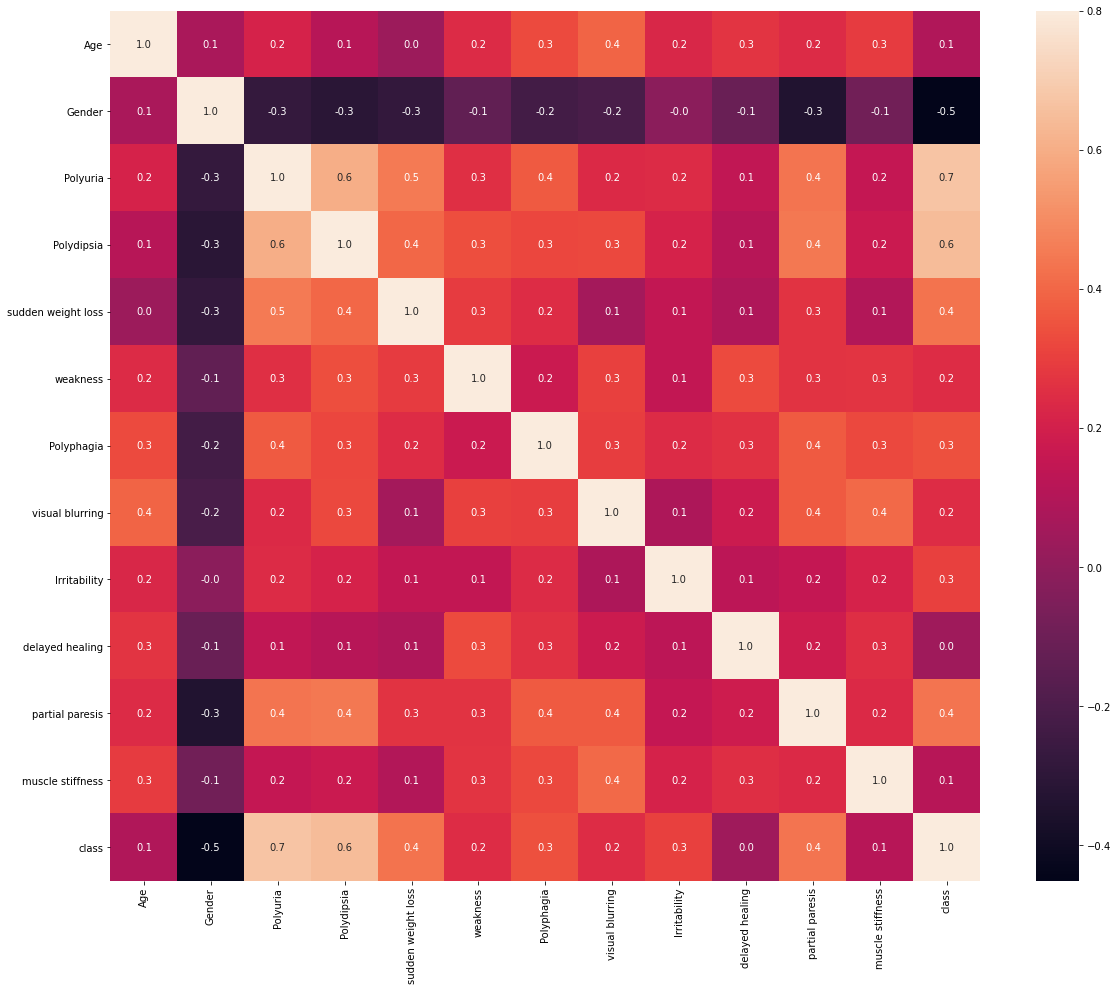

In [59]:
corr_map = dib_df.corr()
fig, ax = plt.subplots(figsize=(20,16))
sns.heatmap(corr_map, vmax=.8, square=True, annot=True, fmt='.1f')
plt.show();

#### Analysing the strongly correlated variables like Polyuria , Polydipsia , partial paresis , sudden weight loss , Polyphagia . These correlations are so strong that it can indicate a situation of multicollinearity.

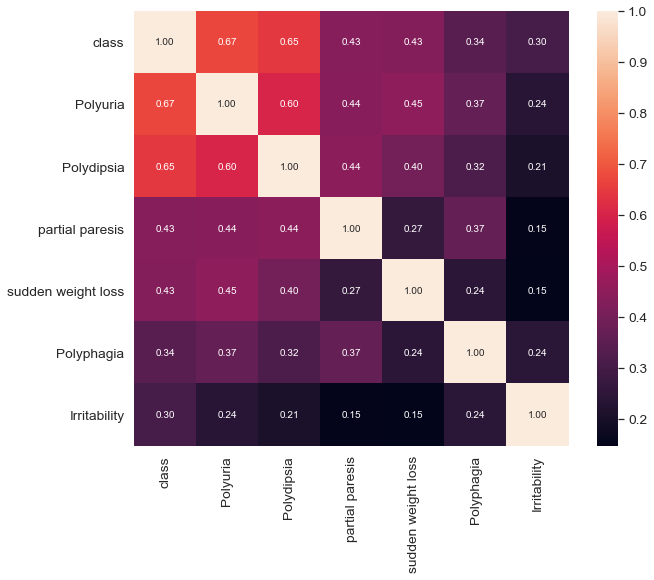

In [60]:
# HeatMTop 7 high correlation to class matrix

n = 7
cols = corr_map.nlargest(n, 'class')['class'].index
cm = np.corrcoef(dib_df[cols].values.T)
sns.set(font_scale=1.25)
fig, ax = plt.subplots(figsize=(10,8))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, xticklabels=cols , yticklabels=cols) 
plt.show()

#### --> 'Polyuria' and 'Polydipsia' are like twins. So we just need one. We will choose 'Polyuria' because it has a stronger correlation to 'class'!. 
#### --> 'partial paresis' and 'sudden weight loss' are like twins. So we just need one. We will choose 'partial paresis' because it has a stronger correlation to 'class'!. 
#### --> 'Polyphagia' and 'Irritability' are like twins. So we just need one. We will choose 'Polyphagia' because it has a stronger correlation to 'class'!. 
####                                  Drop 'Polydipsia'
####                                  Drop 'sudden weight loss'
####                                  Drop 'Irritability'

### Analysing the Strongly Correlated Values

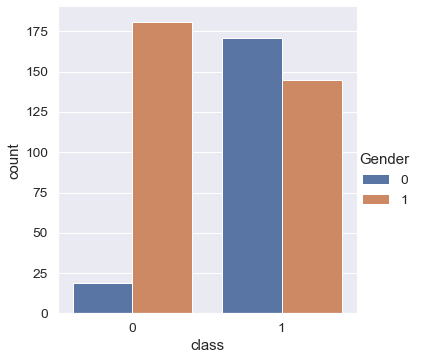

In [61]:
sns.catplot(x="class",data=dib_df,hue = "Gender",kind="count")
# 1 of class denotes Positive and 1 of Polyuria denotes Yes

#### Inference :- We can see that the People who suffers from Polyuria also suffers from Diabetes . So our data shows a good trend.

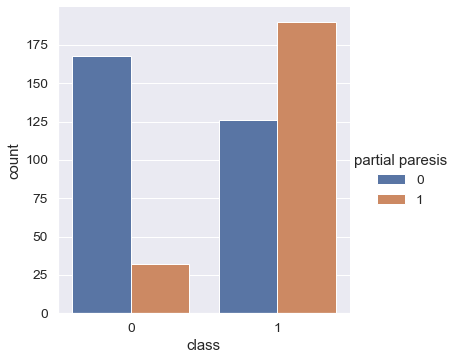

In [62]:
sns.catplot(x="class",data=dib_df,hue = "partial paresis",kind="count")
# 1 of class denotes Positive and 1 of partial paresis denotes Yes

#### Inference :- We can see that the People who suffers from partial paresis also suffers from Diabetes . So our data shows a good trend.

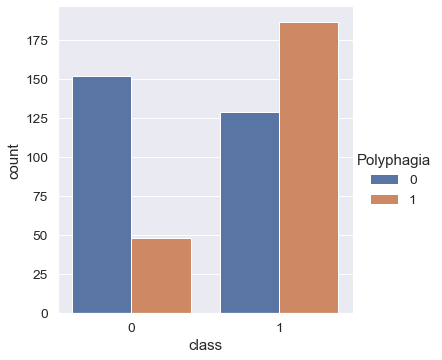

In [63]:
sns.catplot(x="class",data=dib_df,hue = "Polyphagia",kind="count")
# 1 of class denotes Positive and 1 of Polyphagia denotes Yes

#### Inference :- We can see that the People who suffers from Polyphagia also suffers from Diabetes . So our data shows a good trend.

In [64]:
### We will now begin an analysis on the normality of some of our very important features. Let's note our most important variables thus far: -- Polyuria -- Polydipsia -- Polyphagia
### 

Skew is:  0.015549580643096379


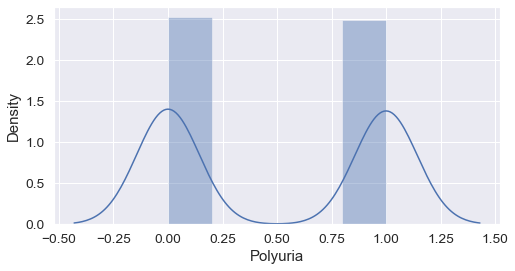

In [65]:
f, ax = plt.subplots(figsize=(8, 4)) 
sns.distplot(dib_df['Polyuria'])
print("Skew is: ", dib_df['Polyuria'].skew())

#### Inference :- Since skewness is very low (closing to zero) for Polyuria so it is Normally distributed.

Skew is:  0.2269000807090962


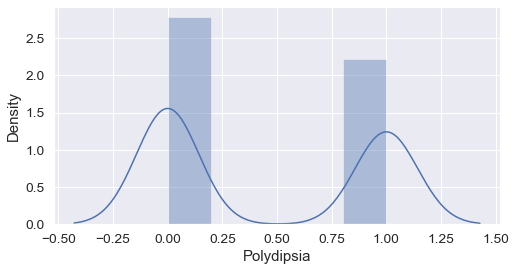

In [66]:
f, ax = plt.subplots(figsize=(8, 4)) 
sns.distplot(dib_df['Polydipsia'])
print("Skew is: ", dib_df['Polydipsia'].skew())

#### Inference :- Since skewness is very low (closing to zero) for Polydipsia so it is Normally distributed.

Skew is:  0.17952960978604943


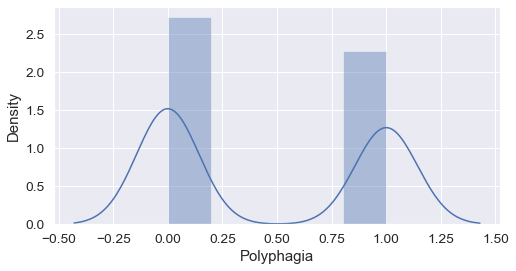

In [67]:
f, ax = plt.subplots(figsize=(8, 4)) 
sns.distplot(dib_df['Polyphagia'])
print("Skew is: ", dib_df['Polyphagia'].skew())

#### Inference :- Since skewness is very low (closing to zero) for Polyphagia so it is Normally distributed.

In [68]:
# we will begin by applying log transformation to skewed numeric features

num_data = dib_df.dtypes[dib_df.dtypes != "object"].index
skew_data = dib_df[num_data].apply(lambda x: skew(x.dropna())) 
skew_data = skew_data[skew_data > 0.75]
skew_data = skew_data.index
skew_data
dib_df[skew_data] = np.log1p(dib_df[skew_data])

In [69]:
# Drop variables noted in EDA section

drop_me = ['Polydipsia' , 'sudden weight loss' , 'Irritability'] 
dib_df = dib_df.drop(drop_me, axis=1)

In [70]:
# quick look under the head

dib_df.head()

,Age,Gender,Polyuria,weakness,Polyphagia,visual blurring,delayed healing,partial paresis,muscle stiffness,class
0,40,1,0,1,0,0,1,0,1,1
1,58,1,0,1,0,1,0,1,0,1
2,41,1,1,1,1,0,1,0,1,1
3,45,1,0,1,1,0,1,0,0,1
4,60,1,1,1,1,1,1,1,1,1


In [71]:
# split concatonated data into train and test dataframes

from sklearn.model_selection import train_test_split 
y = dib_df['class']
X = dib_df.loc[:, dib_df.columns != 'class'] 
print(X.shape)

(516, 9)


In [72]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42) # Initializing various variables

In [73]:
print(X_train.shape) 
print(X_test.shape) 
print(y_train.shape) 
print(y_test.shape)

(361, 9)
(155, 9)
(361,)
(155,)


### Build the Model
#### We will attempt to apply the following models:
          Logistic Regression 
          Decision Tree 
          Random Forests

#### --> Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = "liblinear" , multi_class = "ovr") 
lr.fit(X_train , y_train)
lr_predict = lr.predict(X_test)

#### --> Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train , y_train)
dt_predict = dt.predict(X_test)

#### --> Random Forest

In [76]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion = "entropy")
rf.fit(X_train , y_train)
rf_predict = rf.predict(X_test)
rf_predict

array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1])

## Model Evaluation
### Train Score and Test Score

In [77]:
# Train score & Test score of Logistic Regression

from sklearn.metrics import accuracy_score 
print("Train Accuracy of Logistic Regression", lr.score (X_train, y_train)*100) 
print("Accuracy (Test) score of Logistic Regression", lr.score (X_test, y_test)*100) 
print("Accuracy (Test) score of Logistic Regression", accuracy_score(y_test, lr_predict)*100)

Train Accuracy of Logistic Regression 87.81163434903047
Accuracy (Test) score of Logistic Regression 87.74193548387098
Accuracy (Test) score of Logistic Regression 87.74193548387098


In [78]:
#Train score & Test score of Decision Tree 

print("Train Accuracy of Decesion Tree", dt.score(X_train,y_train)*100) 
print("Accuracy (Test) score of Decesion Tree", dt.score (X_test, y_test)*100) 
print("Accuracy score of Decesion Tree", accuracy_score(y_test,dt_predict)*100)

Train Accuracy of Decesion Tree 99.44598337950139
Accuracy (Test) score of Decesion Tree 90.32258064516128
Accuracy score of Decesion Tree 90.32258064516128


In [79]:
# Train score & Test score of Random Forest 

print ("Train Accuracy of Random Forest", rf.score (X_train,y_train)*100) 
print("Accuracy (Test) score of Random Forest",rf.score(X_test, y_test)*100) 
print("Accuracy score of Random Forest", accuracy_score(y_test, rf_predict)*100)

Train Accuracy of Random Forest 99.44598337950139
Accuracy (Test) score of Random Forest 92.25806451612904
Accuracy score of Random Forest 92.25806451612904


## --> Confusion Matrix ,Precision ,Recall ,F1 Score
### --> Confusion Matrix of "Logistic Regression"

TN - True Negative 53
FP False Positive 8
FN - False Negative 11
TP - True Positive 83
Accuracy Rate: 87.74193548387098
Misclassification Rate: 12.258064516129032
Classification Report of LR: 
               precision    recall  f1-score   support

           0     0.8281    0.8689    0.8480        61
           1     0.9121    0.8830    0.8973        94

    accuracy                         0.8774       155
   macro avg     0.8701    0.8759    0.8726       155
weighted avg     0.8790    0.8774    0.8779       155



<AxesSubplot:>

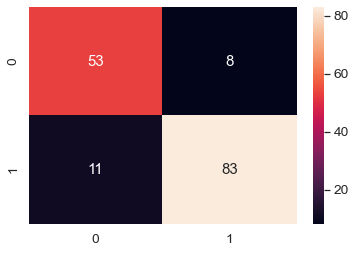

In [81]:
# Making the Confusion Matrix of Logistic Regression 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, lr_predict)
print('TN - True Negative {}'.format(cm[0,0]))
print('FP False Positive {}'.format(cm[0,1]))
print('FN - False Negative {}'.format(cm[1,0]))
print('TP - True Positive {}'.format(cm[1,1])) 
print('Accuracy Rate: {}'.format(np. divide (np. sum([cm[0,0], cm[1,1]]), np. sum(cm))*100)) 
print('Misclassification Rate: {}'.format(np.divide (np. sum([cm[0,1],cm[1,0]]),np.sum(cm))*100))
print('Classification Report of LR: \n', classification_report (y_test, lr_predict, digits=4))
sns.heatmap(confusion_matrix(y_test, lr_predict), annot=True, fmt="d") # Displaying Heatmap

### --> Confusion Matrix of "Decision Tree"

TN True Negative 52
FP - False Positive 9
FN- False Negative 6
TP True Positive 88
Accuracy Rate: 0.9032258064516129
Misclassification Rate: 0.0967741935483871
Classification Report of DT: 
               precision    recall  f1-score   support

           0     0.8966    0.8525    0.8739        61
           1     0.9072    0.9362    0.9215        94

    accuracy                         0.9032       155
   macro avg     0.9019    0.8943    0.8977       155
weighted avg     0.9030    0.9032    0.9028       155



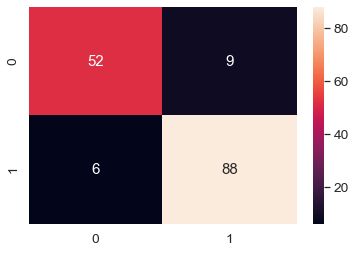

In [82]:
sns.heatmap(confusion_matrix(y_test, dt_predict), annot=True, fmt="d")# Displaying Heatmap
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, dt_predict)
print('TN True Negative {}'.format(cm[0,0]))
print('FP - False Positive {}'.format(cm[0,1]))
print('FN- False Negative {}'.format(cm[1,0])) 
print('TP True Positive {}'.format(cm[1,1]))
print('Accuracy Rate: {}'.format(np.divide (np. sum([cm[0,0], cm[1,1]]), np.sum(cm)))) 
print('Misclassification Rate: {}'.format(np.divide (np.sum( [cm[0,1], cm[1,0]]), np.sum(cm))))
print('Classification Report of DT: \n', classification_report (y_test, dt_predict, digits=4))

### --> Confusion Matrix of "Random Forest"

TN - True Negative 55
FP - False Positive 6
FN - False Negative 6
TP True Positive 88
Accuracy Rate: 0.9225806451612903
Misclassification Rate: 0.07741935483870968
Classification Report of RF: 
               precision    recall  f1-score   support

           0     0.9016    0.9016    0.9016        61
           1     0.9362    0.9362    0.9362        94

    accuracy                         0.9226       155
   macro avg     0.9189    0.9189    0.9189       155
weighted avg     0.9226    0.9226    0.9226       155



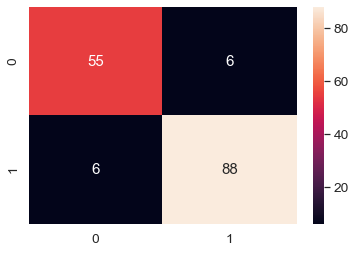

In [83]:
cm = confusion_matrix(y_test, rf_predict)
print ('TN - True Negative {}'.format(cm[0,0]))
print ('FP - False Positive {}'.format(cm[0,1])) 
print('FN - False Negative {}'.format(cm[1,0]))
print ('TP True Positive {}'.format(cm[1,1]))
print('Accuracy Rate: {}'.format(np.divide (np.sum([cm[0,0], cm[1,1]]), np.sum(cm)))) 
print('Misclassification Rate: {}'.format(np.divide (np. sum([cm[0,1], cm[1,0]]), np.sum(cm))))
print('Classification Report of RF: \n', classification_report(y_test,rf_predict, digits=4))

## Inference :- Random Forest Predicts Best Among the three Models